In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('C:/Users/dylan/Documents/')
from nbc.nbc import NBC
import argparse
from scipy import stats

In [21]:
parser = argparse.ArgumentParser()
NBC.add_args(parser)
args = parser.parse_args([
    '--subsample', '5',
    '--train_sequencing', 'session',
    '--dev_sequencing', 'session',
    '--test_sequencing', 'session',
    '--label_method', 'actions',
])
fps = 90 // 5
nbc = NBC(args)

loaded cached data from args


# Distribution of actions

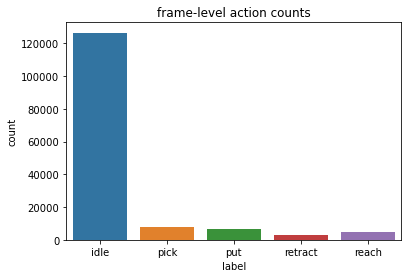

In [22]:
y = []
for type in ['train', 'dev', 'test']:
    y += [np.concatenate(list(nbc.labels[type].values()))]
y = np.concatenate(y)
labels = pd.DataFrame({'label': y})
actions = {1: 'idle', 2: 'reach', 3: 'pick', 4: 'put', 5: 'retract'}
labels = labels.replace({'label': actions})
plt.title('frame-level action counts')
sns.countplot(x='label', data=labels)

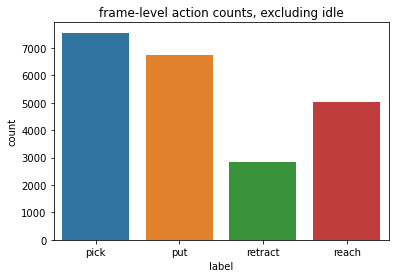

In [23]:
labels_excl = labels.copy()
labels_excl = labels_excl[labels_excl['label'] != 'idle']
plt.title('frame-level action counts, excluding idle')
sns.countplot(x='label', data=labels_excl)

In [24]:
prev = 1
labels = []
lengths = []
for type in ['train', 'dev', 'test']:
    for seq in nbc.labels[type].values():
        n = 0
        for label in seq:
            if label != prev:
                labels.append(int(prev))
                lengths.append(n)
                n = 0
                prev = label
            else:
                n += 1            
rle = pd.DataFrame({'label': labels, 'length': np.array(lengths) / float(fps)})
rle = rle.replace({'label': actions})

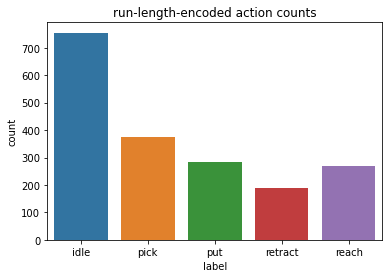

In [25]:
plt.title('run-length-encoded action counts')
sns.countplot(x='label', data=rle)

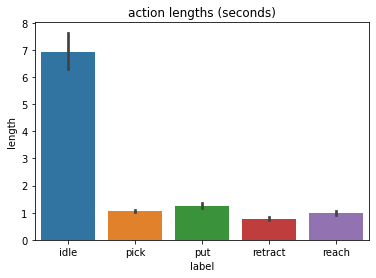

In [26]:
plt.title('action lengths (seconds)')
sns.barplot(x='label', y='length', data=rle)

In [27]:
rle['length (frames)'] = rle.apply(lambda row: row['length'] * fps, axis=1)
print(rle.groupby('label').mean())

           length  length (frames)
label                             
idle     6.941428       124.945695
pick     1.061466        19.106383
put      1.260759        22.693662
reach    0.982652        17.687732
retract  0.781011        14.058201
